In [1]:
import pandas as pd
import math

In [2]:
retail_df=pd.read_excel('data/Online Retail.xlsx')
retail_df.head()
print(retail_df.shape)

(541909, 8)


In [3]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
retail_df=retail_df[retail_df['Quantity']>0]
retail_df=retail_df[retail_df['UnitPrice']>0]
retail_df=retail_df[retail_df['CustomerID'].notnull()]
retail_df['CustomerID']=retail_df['CustomerID'].astype(int)

In [5]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int32         
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 25.8+ MB


In [7]:
retail_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
print(retail_df.shape)

(397884, 8)


In [11]:
retail_df.drop_duplicates(inplace=True) # 중복 레코드 확인
print(retail_df.shape)

(392692, 8)


In [12]:
pd.DataFrame([{'Product':len(retail_df['StockCode'].value_counts()),'Transaction':len(retail_df['InvoiceNo'].value_counts()),
               'Customer':len(retail_df['CustomerID'].value_counts())}], columns=['Product', 'Transaction', 'Customer'], index=['counts'])

,Product,Transaction,Customer
counts,3665,18532,4338


In [13]:
retail_df['Country'].value_counts()

United Kingdom          349203
Germany                   9025
France                    8326
EIRE                      7226
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1453
Australia                 1181
Norway                    1071
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45
Lithuani

In [14]:
retail_df['SaleAmount']=retail_df['UnitPrice']*retail_df['Quantity']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SaleAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [17]:
aggregation={'InvoiceNo':'count','SaleAmount':'sum', 'InvoiceDate':'max'}
customer_df=retail_df.groupby('CustomerID').agg(aggregation)
customer_df=customer_df.reset_index()
customer_df.head()

,CustomerID,InvoiceNo,SaleAmount,InvoiceDate
0,12346,1,77183.60,2011-01-18 10:01:00
1,12347,182,4310.00,2011-12-07 15:52:00
2,12348,31,1797.24,2011-09-25 13:13:00
3,12349,73,1757.55,2011-11-21 09:51:00
4,12350,17,334.40,2011-02-02 16:01:00


In [18]:
customer_df=customer_df.rename(columns={'InvoiceNo':'Freq', 'InvoiceDate':'ElapsedDays'})
customer_df

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,77183.60,2011-01-18 10:01:00
1,12347,182,4310.00,2011-12-07 15:52:00
2,12348,31,1797.24,2011-09-25 13:13:00
3,12349,73,1757.55,2011-11-21 09:51:00
4,12350,17,334.40,2011-02-02 16:01:00
...,...,...,...,...
4333,18280,10,180.60,2011-03-07 09:52:00
4334,18281,7,80.82,2011-06-12 10:53:00
4335,18282,12,178.05,2011-12-02 11:43:00
4336,18283,721,2045.53,2011-12-06 12:02:00


In [21]:
import datetime
customer_df['ElapsedDays']=datetime.datetime(2011,12,30)-customer_df['ElapsedDays']
customer_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,77183.60,345 days 13:59:00
1,12347,182,4310.00,22 days 08:08:00
2,12348,31,1797.24,95 days 10:47:00
3,12349,73,1757.55,38 days 14:09:00
4,12350,17,334.40,330 days 07:59:00


In [22]:
customer_df['ElapsedDays']=customer_df['ElapsedDays'].apply(lambda x: x.days+1)
customer_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,77183.60,346
1,12347,182,4310.00,23
2,12348,31,1797.24,96
3,12349,73,1757.55,39
4,12350,17,334.40,331


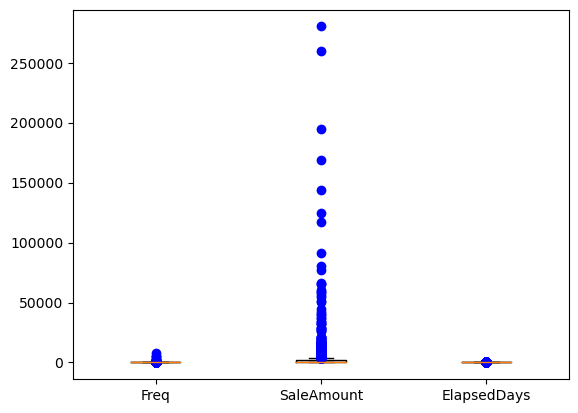

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax =plt.subplots()

ax.boxplot([customer_df['Freq'], customer_df['SaleAmount'], customer_df['ElapsedDays']], sym='bo')
plt.xticks([1,2,3], ['Freq', 'SaleAmount', 'ElapsedDays'])
plt.show()

In [26]:
import numpy as np

customer_df['Freq_log']=np.log1p(customer_df['Freq'])
customer_df['SaleAmount_log']=np.log1p(customer_df['SaleAmount'])
customer_df['ElapsedDays_log']=np.log1p(customer_df['ElapsedDays'])
customer_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays,Freq_log,SaleAmount_log,ElapsedDays_log
0,12346,1,77183.60,346,0.693147,11.253955,5.849325
1,12347,182,4310.00,23,5.209486,8.368925,3.178054
2,12348,31,1797.24,96,3.465736,7.494564,4.574711
3,12349,73,1757.55,39,4.304065,7.472245,3.688879
4,12350,17,334.40,331,2.890372,5.815324,5.805135


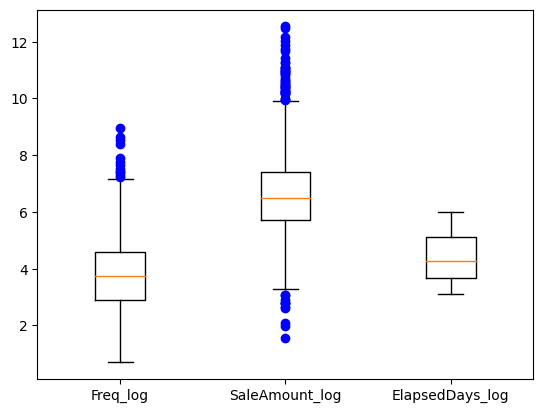

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax =plt.subplots()

ax.boxplot([customer_df['Freq_log'], customer_df['SaleAmount_log'], customer_df['ElapsedDays_log']], sym='bo')
plt.xticks([1,2,3], ['Freq_log', 'SaleAmount_log', 'ElapsedDays_log'])
plt.show()

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler

In [32]:
X_features=customer_df[['Freq_log', 'SaleAmount_log', 'ElapsedDays_log']].values

X_features_scaled=StandardScaler().fit_transform(X_features)
X_features_scaled

array([[-2.43820181,  3.7077163 ,  1.7481512 ],
       [ 1.18898578,  1.41490344, -1.42891272],
       [-0.21146474,  0.72002428,  0.23219509],
       ...,
       [-0.9349095 , -1.11333158, -1.20383861],
       [ 2.29130702,  0.82281217, -1.38036126],
       [ 0.42858139,  0.73752572, -0.26236792]])

c:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\clust

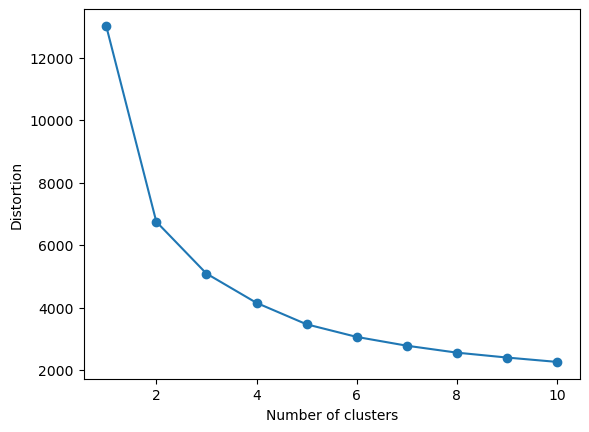

In [33]:
distortions=[]
for i in range(1, 11):
    kmeans_i=KMeans(n_clusters=i, random_state=0)
    kmeans_i.fit(X_features_scaled)
    distortions.append(kmeans_i.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [34]:
kmeans=KMeans(n_clusters=3, random_state=0)
Y_labels=kmeans.fit_predict(X_features_scaled)
customer_df['ClusterLabel']=Y_labels
customer_df.head()

c:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CustomerID,Freq,SaleAmount,ElapsedDays,Freq_log,SaleAmount_log,ElapsedDays_log,ClusterLabel
0,12346,1,77183.60,346,0.693147,11.253955,5.849325,1
1,12347,182,4310.00,23,5.209486,8.368925,3.178054,0
2,12348,31,1797.24,96,3.465736,7.494564,4.574711,2
3,12349,73,1757.55,39,4.304065,7.472245,3.688879,0
4,12350,17,334.40,331,2.890372,5.815324,5.805135,1


In [39]:
from matplotlib import cm
def silhouetteViz(n_clusters, X_features):
    kmeans=KMeans(n_clusters=n_clusters, random_state=0)
    Y_labels=kmeans.fit_predict(X_features)
    silhouette_values=silhouette_samples(X_features,Y_labels,metric='euclidean')
    y_ax_lower, y_ax_upper=0,0
    y_ticks=[]

    for c in range(n_clusters):
        c_silhouettes=silhouette_values[Y_labels==c]
        c_silhouettes.sort()
        y_ax_upper+=len(c_silhouettes)
        color=cm.jet(float(c)/n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),c_silhouettes,height=1.0, edgecolor='none', color=color)
        y_ticks.append((y_ax_lower+y_ax_upper)/2)
        y_ax_lower+=len(c_silhouettes)

    silhouette_avg=np.mean(silhouette_values)
    plt.axvline(silhouette_avg, color='red', linestyle='--')
    plt.title('Number of cluster:'+str(n_clusters)+"\n"+'silhouette_score:'+str(round(silhouette_avg,3)))
    plt.yticks(y_ticks, range(n_clusters))
    plt.xticks([0,0.2,0.4,0.6,0.8,1])
    plt.ylabel('Cluster')
    plt.xlabel('Silhout coefficient')
    plt.show()

In [41]:
def clusterScatter(n_cluster, X_features):
    c_colors=[]
    kmeans=KMeans(n_clusters=n_cluster, random_state=0)
    Y_labels=kmeans.fit_predict(X_features)

    for i in range(n_cluster):
        c_color=cm.jet(float(i)/n_cluster)
        c_colors.append(c_color)
        plt.scatter(X_features[Y_labels==i, 0], X_features[Y_labels==i, 1], marker='o',
                    color=c_color, edgecolors='black', s=50, label='cluster '+str(i))
        
    for i in range(n_cluster):
        plt.scatter(kmeans.cluster_centers_[i,0], kmeans.cluster_centers_[i,1], marker='^',
                    color=c_colors[i], edgecolors='w', s=200)
        
    plt.legend()
    plt.grid()
    plt.show()

c:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


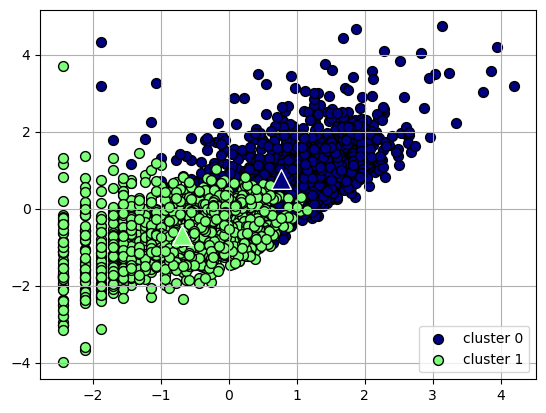

In [42]:
clusterScatter(2,X_features_scaled)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


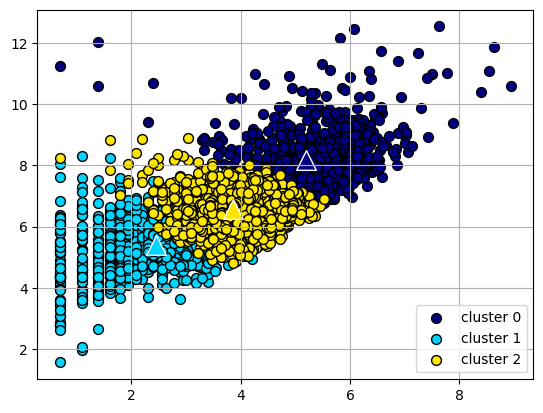

In [43]:
clusterScatter(3, X_features)

In [44]:
customer_df.groupby('ClusterLabel')['CustomerID'].count()

ClusterLabel
0    1343
1    1317
2    1678
Name: CustomerID, dtype: int64

In [46]:
customer_cluster_df=customer_df.groupby('ClusterLabel').agg({'Freq':'mean','SaleAmount':'mean', 'ElapsedDays':'mean'})
customer_cluster_df

,Freq,SaleAmount,ElapsedDays
ClusterLabel,,,
0,222.263589,5357.482480,51.416977
1,20.900532,437.151838,237.211086
2,39.729440,665.304501,64.953516
